### Mestrado Profissional em Computação Aplicada

#### **Disciplina**: Redes Neurais Artificiais 
####  **Professor**: Dr. Francisco de Assis Boldt
#### **Aluno**: Adriel Monti De Nardi

------



### Trabalho 02: Perceptron Multiclasse

Para concluir a atividade proposta devemos implementar uma Rede Neural rasa para classificação de uma base multiclasse.




#Função Geradataset , Plotadataset e Plota Hiperplano

Nesse bloco foi elaborado uma função para gerar os datasets, plotar o dataset e o hiperplano


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import label_binarize

def geradataset(tamanho=20, centros=2):
    X, y = make_blobs(n_samples=tamanho, centers=centros, center_box=(0, 1.0), cluster_std=0.05)
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def plotahiperplano(vetor, bias=0, xmin=0, xmax=1):
    xs = np.linspace(xmin, xmax, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - bias / vetor[1]
    plt.plot(xs,ys)


#Funções de Custo

Serão usados neste trabalho as funções de custo Perceptron e Adaline. Como o trabalho exige que rode tanto na base binária quanto na multiclasse, foi adaptado no código um if else na função da gradiente, para rodar conforme o treino e teste binário ou multiclasse.


In [ ]:
class CustoPerceptron():
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def gradiente(y, ypred, X):
        if (y.ndim>1):
            return np.matmul(X.T,CustoPerceptron.erro(y, ypred))
        else:
            return np.matmul(CustoPerceptron.erro(y, ypred), X)


class Adaline():
    def __init__(self):
        self.preactivated = True
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum((1 - Adaline.erro(y, ypred))**2)
    @staticmethod
    def gradiente(y, ypred, X):
        if (y.ndim>1):
            #MULTICLASSE
            return np.matmul(X.T, Adaline.erro(y, ypred))
        else:
            #BINÁRIO
            return np.matmul(Adaline.erro(y, ypred), X)


#Perceptron

Como o exercício pede para entregar funcionando com base binária e multiclasse, conforme o código disponibilizado no exercício multiclasse, a função de treinamento já está adaptada para rodar tando na base binária quanto na multiclasse.

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, custo=CustoPerceptron(), alpha=0.001, maxiter=200):
    self.w = None
    self.activation = lambda a: (a>=0)*2-1
    self.alpha = alpha
    self.maxiter = maxiter
    self.custo = custo
    
  @staticmethod
  def includebias(X):
    bias = np.ones((X.shape[0],1))
    Xb = np.concatenate((bias,X), axis=1)
    return Xb

  def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.labels = list(set(y))
        
        if len(self.labels) > 2:
            y = label_binarize(y, classes=self.labels)*2-1
            self.w = np.random.uniform(-1, 1, size=(Xb.shape[1], y.shape[1]))
        else:
            self.w = np.random.uniform(-1, 1, size=Xb.shape[1])

        for _ in range(self.maxiter):
            if hasattr(self.custo, 'preactivated') and self.custo.preactivated:
                ypred = self.preactivate(X)
            else:
                a = self.preactivate(X)
                ypred = self.activation(a)
            custo = self.custo.custo(y, ypred)
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, Xb)
            if custo == 0:
                break
  
  def preactivate(self, X):
    Xb = Perceptron.includebias(X)
    return np.matmul(Xb, self.w)

  def predict(self, X):
    a = self.preactivate(X)
    if len(self.w.shape)  > 1:
      idx = np.argmax(a, axis=1)
      ypred = np.array([self.labels[i] for i in idx])
    else:
      ypred = self.activation(a)
    return ypred



#Teste com custo perceptron na base binária 



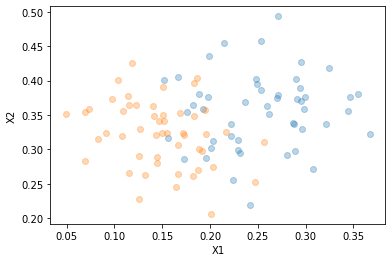

0.5
[ 0.01976407 -0.02381153] 0.0657205594266803


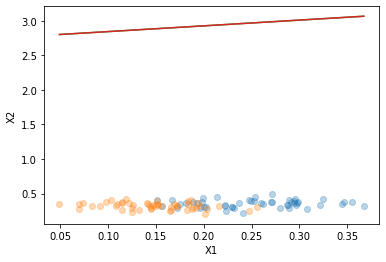

In [ ]:
#Gerar dataset com base binária
X, y = geradataset(100, 2)
plotadataset(X, y)
plt.show()

#treino com custo perceptron
perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))
print(perceptron.w[1:], perceptron.w[0])


plotadataset(X, y)
for i in range(len(set(y))):  
    plotahiperplano(perceptron.w[1:], perceptron.w[0], min(X[:,0]), max(X[:,0]))


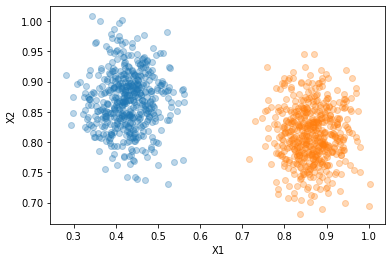

0.5


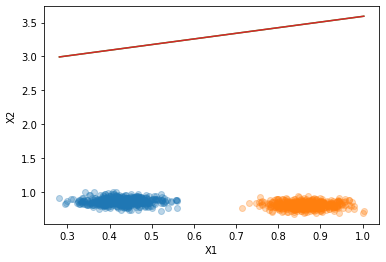

In [ ]:
#Teste com 1000 pontos
X, y = geradataset(1000, 2)
plotadataset(X, y)
plt.show()

#teste com custo perceptron
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

plotadataset(X, y)
for i in range(len(set(y))):  
    plotahiperplano(perceptron.w[1:], perceptron.w[0], min(X[:,0]), max(X[:,0]))


#Teste com custo perceptron na base multiclasse


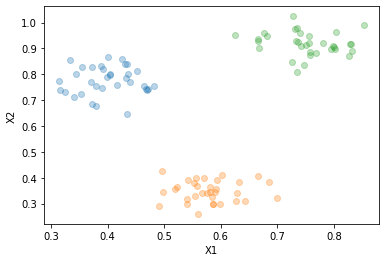

1.0


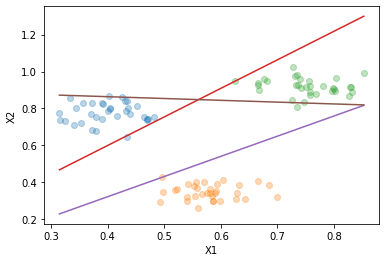

In [ ]:
#Gerar dataset com base multiclasse
X, y = geradataset(100, 3)
plotadataset(X, y)
plt.show()

#treino com custo perceptron
perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

plotadataset(X, y)
for i in range(len(set(y))):  
    plotahiperplano(perceptron.w[1:,i], perceptron.w[0,i], min(X[:,0]), max(X[:,0]))



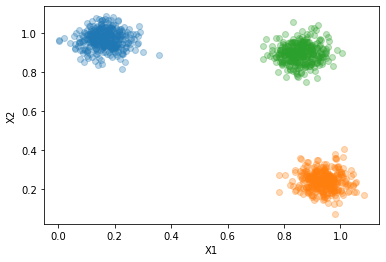

0.981


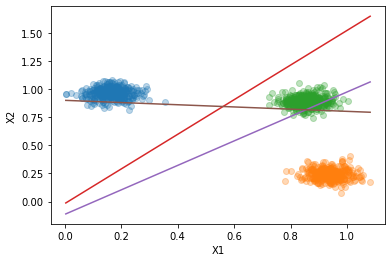

In [ ]:
#Teste com 1000 pontos
X, y = geradataset(1000, 3)
plotadataset(X, y)
plt.show()

#teste com custo perceptron
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

plotadataset(X, y)
for i in range(len(set(y))):  
    plotahiperplano(perceptron.w[1:,i], perceptron.w[0,i], min(X[:,0]), max(X[:,0]))

#Teste com custo Adaline na base binária 

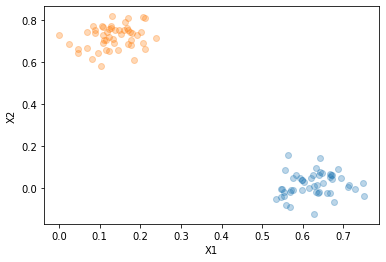

0.5
[0.4286104  1.67098203] -0.2800396678555788


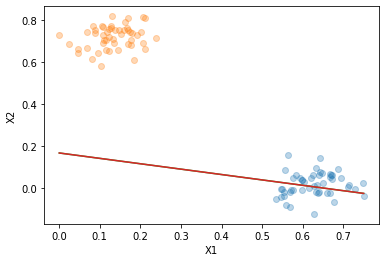

In [ ]:
#Gerar dataset com base binária
X, y = geradataset(100, 2)
plotadataset(X, y)
plt.show()

#treino com custo Adaline
perceptron = Perceptron(custo=Adaline())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))
print(perceptron.w[1:], perceptron.w[0])


plotadataset(X, y)
for i in range(len(set(y))):  
    plotahiperplano(perceptron.w[1:], perceptron.w[0], min(X[:,0]), max(X[:,0]))


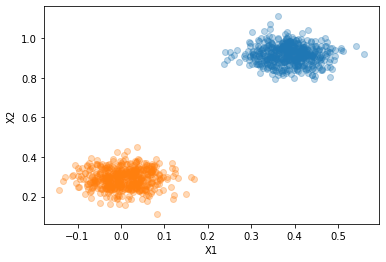

0.495
[0.4286104  1.67098203] -0.2800396678555788


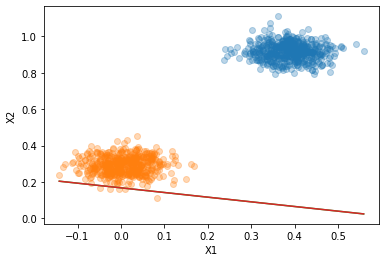

In [ ]:
#Teste com 1000 pontos
X, y = geradataset(1000, 2)
plotadataset(X, y)
plt.show()


#teste com custo Adaline
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))
print(perceptron.w[1:], perceptron.w[0])


plotadataset(X, y)
for i in range(len(set(y))):  
    plotahiperplano(perceptron.w[1:], perceptron.w[0], min(X[:,0]), max(X[:,0]))

#Teste com custo Adaline na base multiclasse

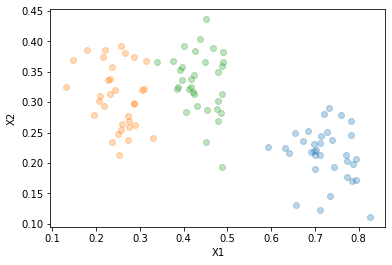

0.9


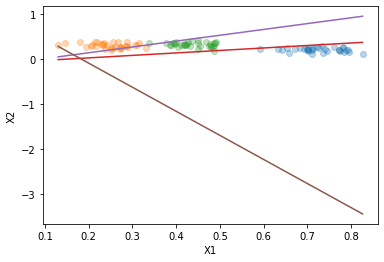

In [ ]:
#Gerar dataset com base multiclasse
X, y = geradataset(100, 3)
plotadataset(X, y)
plt.show()

#treino com custo perceptron
perceptron = Perceptron(custo=Adaline)
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

plotadataset(X, y)
for i in range(len(set(y))):  
    plotahiperplano(perceptron.w[1:,i], perceptron.w[0,i], min(X[:,0]), max(X[:,0]))

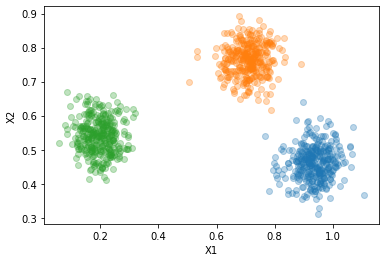

0.619


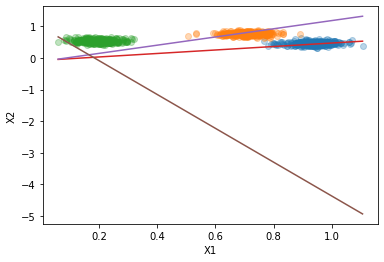

In [ ]:
#Teste com 1000 pontos
X, y = geradataset(1000, 3)
plotadataset(X, y)
plt.show()

#teste com custo perceptron
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

plotadataset(X, y)
for i in range(len(set(y))):  
    plotahiperplano(perceptron.w[1:,i], perceptron.w[0,i], min(X[:,0]), max(X[:,0]))

Obs: como o código foi dividido em blocos separados a função plotahiperplano foi adaptada para rodar na base binária de uma forma e a base multiclasse de uma outra maneira, veja o exemplo:

Plota Hiperplano Binário

```
for i in range(len(set(y))):  
    plotahiperplano(perceptron.w[1:], perceptron.w[0], min(X[:,0]), max(X[:,0]))
```

Plota Hiperplano Multiclasse

```
for i in range(len(set(y))):  
    plotahiperplano(perceptron.w[1:,i], perceptron.w[0,i], min(X[:,0]), max(X[:,0]))
```

